<a href="https://colab.research.google.com/github/Ayush310803/ViT/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install ultralytics opencv-python torch torchvision


0: 640x640 1 person, 248.0ms
Speed: 5.4ms preprocess, 248.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


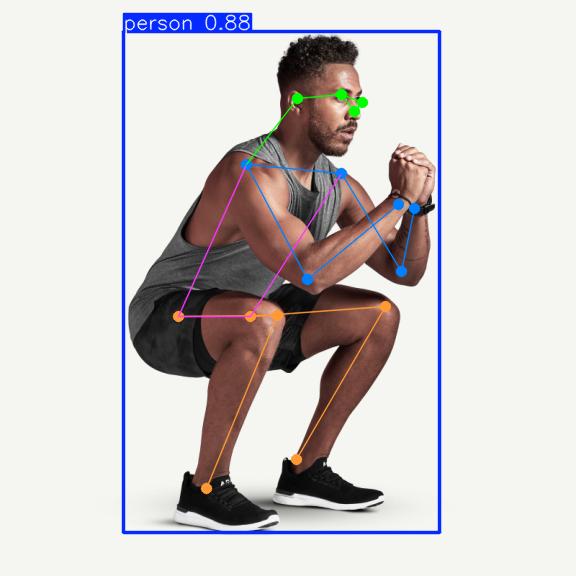

In [69]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8n-pose.pt")
model1 = YOLO("yolo11n.pt")

image_path = "/content/Bodyweight-Squat.jpg"
image = cv2.imread(image_path)

results = model(image)

results[0].show()

In [70]:
for r in results:
    print("\nDetected Objects:", len(r.boxes))

    for i, box in enumerate(r.boxes.xyxy.cpu().numpy()):
        print(f"\nPerson {i+1}:")
        print(f"  Bounding Box (x1, y1, x2, y2): {box}")

    keypoints = r.keypoints.xy.cpu().numpy()
    confidence_scores = r.keypoints.conf.cpu().numpy()

    for i, (person_kpts, confs) in enumerate(zip(keypoints, confidence_scores)):
        print(f"\n  Person {i+1} Keypoints:")
        for j, (kpt, conf) in enumerate(zip(person_kpts, confs)):
            print(f"    Keypoint {j+1} (x, y): {kpt} | Confidence: {conf:.2f}")


Detected Objects: 1

Person 1:
  Bounding Box (x1, y1, x2, y2): [     123.93      31.715      439.98      532.66]

  Person 1 Keypoints:
    Keypoint 1 (x, y): [     354.98      111.84] | Confidence: 1.00
    Keypoint 2 (x, y): [     362.77      102.01] | Confidence: 0.74
    Keypoint 3 (x, y): [     341.57      94.753] | Confidence: 1.00
    Keypoint 4 (x, y): [          0           0] | Confidence: 0.01
    Keypoint 5 (x, y): [     297.47      98.236] | Confidence: 0.99
    Keypoint 6 (x, y): [     341.15      173.97] | Confidence: 0.98
    Keypoint 7 (x, y): [     246.34      164.66] | Confidence: 1.00
    Keypoint 8 (x, y): [     401.25      271.91] | Confidence: 0.89
    Keypoint 9 (x, y): [     307.68      279.13] | Confidence: 1.00
    Keypoint 10 (x, y): [     414.39      208.54] | Confidence: 0.94
    Keypoint 11 (x, y): [     398.54      204.23] | Confidence: 1.00
    Keypoint 12 (x, y): [     250.99       316.9] | Confidence: 1.00
    Keypoint 13 (x, y): [     178.95       

In [71]:
results = model1.train(data="coco8.yaml", epochs=3)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/detect/train5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train5
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.7957      3.002      1.314         22        640: 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all          4         17      0.573       0.85      0.878      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.312      3.106      1.589         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all          4         17      0.564       0.85       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.549      2.592      1.747         20        640: 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          4         17      0.556       0.85      0.851      0.616



3 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


                   all          4         17      0.573       0.85      0.878      0.635
                person          3         10      0.562        0.6      0.593      0.273
                   dog          1          1      0.548          1      0.995      0.697
                 horse          1          2      0.537          1      0.995      0.674
              elephant          1          2      0.369        0.5      0.695      0.276
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1       0.85          1      0.995      0.895
Speed: 2.6ms preprocess, 327.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train5


In [72]:
results = model1.val()
results = model("https://ultralytics.com/images/bus.jpg")
success = model.export(format="onnx")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


                   all          4         17      0.573       0.85      0.878      0.635
                person          3         10      0.562        0.6      0.593      0.273
                   dog          1          1      0.548          1      0.995      0.697
                 horse          1          2      0.537          1      0.995      0.674
              elephant          1          2      0.369        0.5      0.695      0.276
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1       0.85          1      0.995      0.895
Speed: 1.9ms preprocess, 218.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train52

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 200.5ms
Speed: 3.5ms preprocess, 200.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Ultralytics 8.3.75 🚀 Python-3.11.11 to


0: 640x640 1 person, 248.8ms
Speed: 6.3ms preprocess, 248.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


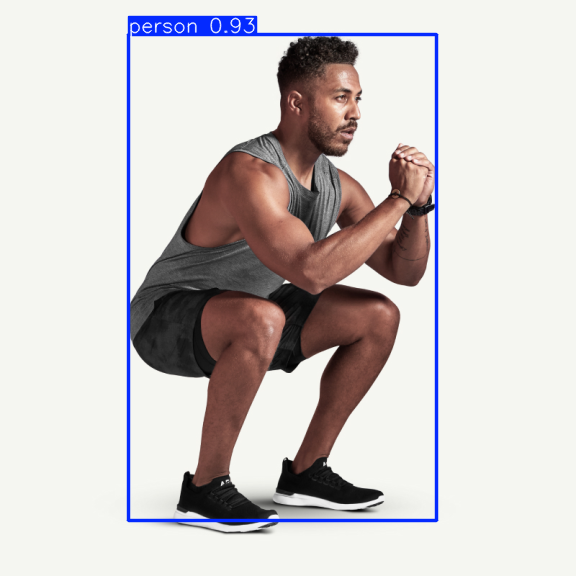

In [73]:
image = cv2.imread("/content/Bodyweight-Squat.jpg")
results = model1(image)
results[0].show()



0: 640x480 4 persons, 1 bus, 247.5ms
Speed: 7.0ms preprocess, 247.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


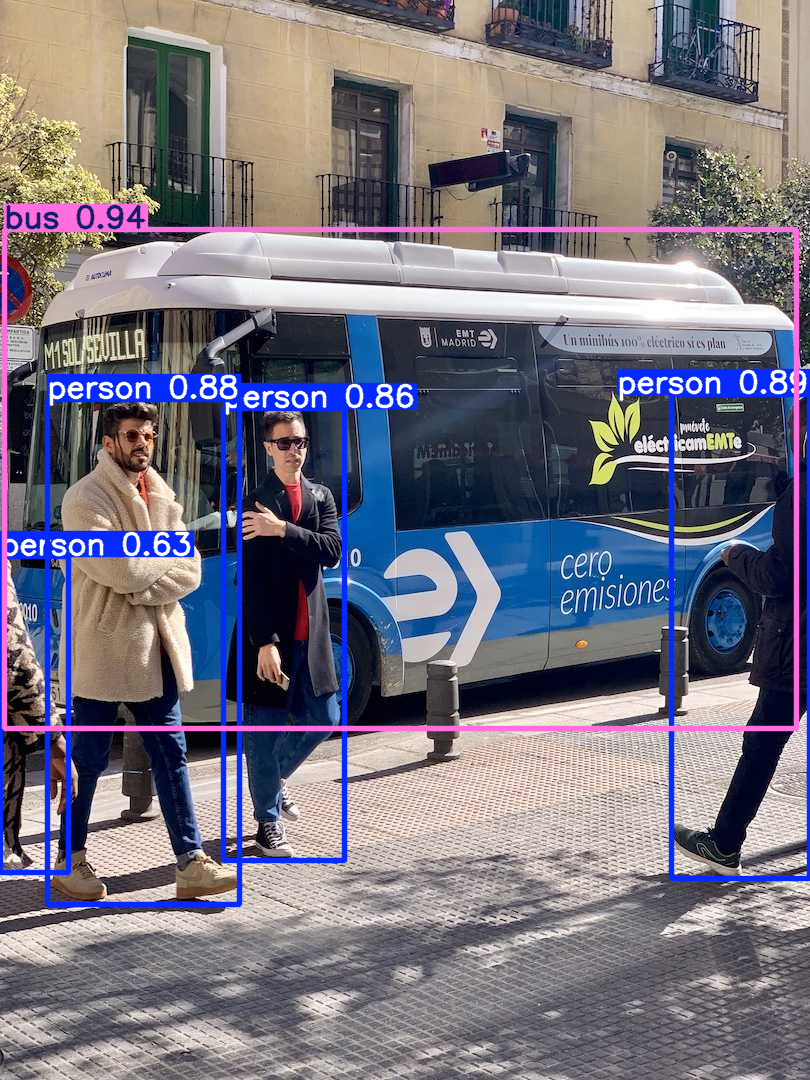

In [74]:
image = cv2.imread("/content/bus.jpg")
results = model1(image)
results[0].show()


0: 640x480 1 dog, 244.6ms
Speed: 5.1ms preprocess, 244.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


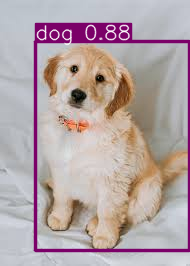

In [75]:
image = cv2.imread("/content/download.jpeg")
results = model1(image)
results[0].show()

In [76]:
from ultralytics import YOLO

model2 = YOLO("yolo11n-pose.yaml")
model2 = YOLO("yolo11n-pose.pt")
model2 = YOLO("yolo11n-pose.yaml").load("yolo11n-pose.pt")

results = model2.train(data="coco8-pose.yaml", epochs=50, imgsz=640)

Transferred 490/541 items from pretrained weights
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.yaml, data=coco8-pose.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=yolo11n-pose.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /content/datasets/coco8-pose/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/pose/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.286      4.475     0.4168      2.861      1.465         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14     0.0108      0.929      0.151     0.0917    0.00833      0.714      0.117     0.0673



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.301      4.654     0.4658      3.117      1.403         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14     0.0108      0.929      0.151     0.0921    0.00833      0.714      0.119     0.0679



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.33       4.61     0.5814      3.197      1.505         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14     0.0108      0.929      0.147      0.099    0.00833      0.714      0.125      0.068



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.09      3.929     0.4514      2.826      1.167         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14     0.0108      0.929      0.146     0.0987    0.00833      0.714      0.126     0.0698



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.038      2.911     0.3034      3.004      1.357          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929       0.15      0.101    0.00833      0.714      0.116     0.0679



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.9899       2.48     0.4394      2.702      1.151         17        640: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929      0.149      0.115     0.0075      0.643      0.116     0.0615



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.9988      3.298     0.3637       2.71      1.077         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929      0.173      0.135    0.00917      0.786       0.18     0.0737



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.9182      2.552     0.3347      2.651      1.058         17        640: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929      0.205      0.155     0.0075      0.643       0.14     0.0727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8672      2.126     0.2607      2.489      1.184         14        640: 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all          4         14     0.0108      0.929      0.246      0.182     0.0075      0.643      0.156     0.0766



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8806      2.615     0.3694      2.617      1.262         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929      0.225       0.18     0.0075      0.643      0.163     0.0746



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.201      4.412      0.435      2.921      1.253         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all          4         14     0.0108      0.929      0.276      0.207     0.0075      0.643      0.185     0.0845



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9335      2.336     0.2675      2.566      1.087         11        640: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14       0.01      0.857      0.328      0.241    0.00667      0.571      0.201     0.0907



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.214      3.522     0.2466      3.061       1.42          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all          4         14       0.01      0.857      0.352      0.257    0.00667      0.571      0.231     0.0952



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.8551      2.984     0.2679        2.4     0.9322         15        640: 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14       0.01      0.857      0.396      0.265    0.00583        0.5      0.203     0.0883



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.186      2.767     0.3627      2.539      1.076         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         14       0.01      0.857      0.453      0.266      0.005      0.429      0.212     0.0727



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.029      4.288     0.3258      2.413      1.069         22        640: 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14       0.01      0.857      0.442      0.266    0.00583        0.5      0.253     0.0755



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7971      2.055     0.2832      2.235     0.9127         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all          4         14     0.0108      0.929      0.539      0.296      0.005      0.429      0.154     0.0557



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.8812       2.23     0.2769       2.27      1.096         11        640: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0108      0.929      0.539      0.296      0.005      0.429      0.154     0.0557



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8134      2.708     0.3693      2.165     0.8986         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          4         14     0.0108      0.929      0.453      0.276    0.00583        0.5      0.193      0.057



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.9168      2.064     0.3528      2.177     0.9885         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         14     0.0108      0.929      0.453      0.276    0.00583        0.5      0.193      0.057



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.8743      3.534     0.3071      2.335     0.9753         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all          4         14     0.0117          1      0.551      0.309      0.005      0.429       0.14      0.032



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.7499      2.006      0.264      2.058     0.9768         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0117          1      0.551      0.309      0.005      0.429       0.14      0.032



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.051      3.618     0.4214      2.275      1.238         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14     0.0108      0.929      0.654      0.327    0.00583        0.5      0.148     0.0291



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.039       2.76     0.3407       2.22      1.154         15        640: 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14     0.0108      0.929      0.654      0.327    0.00583        0.5      0.148     0.0291



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.189      3.339     0.3973      2.352      1.322         10        640: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14     0.0117          1      0.647      0.365    0.00583        0.5      0.142     0.0307



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8533       3.09     0.2454      2.298      1.225          8        640: 100%|██████████| 1/1 [00:04<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14     0.0117          1      0.647      0.365    0.00583        0.5      0.142     0.0307



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7284      2.583     0.2866      2.113      1.105         11        640: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0108      0.929      0.623      0.388      0.005      0.429      0.217     0.0305



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7555       1.75     0.2385      2.032     0.9298          9        640: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         14     0.0108      0.929      0.623      0.388      0.005      0.429      0.217     0.0305



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.9807      2.731      0.301      2.064     0.9464         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         14     0.0108      0.929      0.526      0.332      0.005      0.429      0.179     0.0272



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7366       2.28     0.2547      1.818     0.9268         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14     0.0108      0.929      0.526      0.332      0.005      0.429      0.179     0.0272



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.031        3.2     0.3784      2.155      1.106         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0117          1      0.511       0.33    0.00667      0.571      0.198     0.0323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7899      1.989     0.2447      2.092      1.128          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all          4         14     0.0117          1      0.511       0.33    0.00667      0.571      0.198     0.0323



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.363      3.353     0.2639      2.057      1.146         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14     0.0117          1      0.525      0.339    0.00667      0.571      0.341     0.0586



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8921       3.29     0.3036      1.977      1.054         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all          4         14     0.0117          1      0.525      0.339    0.00667      0.571      0.341     0.0586



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9761      3.441     0.2351      1.981      1.163         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all          4         14     0.0108      0.929      0.504      0.324    0.00667      0.571      0.345      0.082



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6651      1.933      0.284      1.735     0.8965         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          4         14     0.0108      0.929      0.504      0.324    0.00667      0.571      0.345      0.082



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6933      1.654     0.3707      1.979     0.9755          8        640: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14     0.0117          1      0.554      0.326    0.00583        0.5      0.339     0.0806



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9644      2.332     0.2752      1.857      1.045         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          4         14     0.0117          1      0.554      0.326    0.00583        0.5      0.339     0.0806



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5891      1.401     0.3038      1.609     0.9132         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         14     0.0108      0.929      0.555       0.34      0.005      0.429      0.183      0.068



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      0.987      3.601       0.34      1.865      1.036         20        640: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14     0.0108      0.929      0.555       0.34      0.005      0.429      0.183      0.068


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.8167      1.637     0.2296      1.804     0.8539          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0108      0.929      0.568       0.34      0.005      0.429      0.192     0.0604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5078      1.174     0.2525        1.6     0.8849          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14     0.0108      0.929      0.568       0.34      0.005      0.429      0.192     0.0604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.7365      1.962     0.2454      1.745     0.9093          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0108      0.929       0.56      0.352      0.005      0.429      0.192     0.0606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.7543      2.067     0.2555      1.806       1.04          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14     0.0108      0.929       0.56      0.352      0.005      0.429      0.192     0.0606



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8266      1.592     0.2684       1.77      1.139          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14     0.0108      0.929      0.575      0.364    0.00583        0.5       0.22     0.0604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.7494      1.366      0.253       1.63      1.098          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         14     0.0108      0.929      0.575      0.364    0.00583        0.5       0.22     0.0604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.7686      1.669     0.2377      1.579     0.9245          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          4         14     0.0117          1      0.588      0.382    0.00583        0.5      0.218     0.0616



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5877      1.292     0.2525      1.589     0.9249          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14     0.0117          1      0.588      0.382    0.00583        0.5      0.218     0.0616



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5952      1.623     0.3228      1.726     0.9332          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         14     0.0117          1      0.607      0.393    0.00583        0.5      0.241      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5511      1.206     0.2386      1.824     0.9452          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14     0.0117          1      0.607      0.393    0.00583        0.5      0.241      0.109



50 epochs completed in 0.087 hours.
Optimizer stripped from runs/pose/train6/weights/last.pt, 6.1MB
Optimizer stripped from runs/pose/train6/weights/best.pt, 6.1MB

Validating runs/pose/train6/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


                   all          4         14     0.0117          1      0.597      0.392    0.00583        0.5      0.241      0.109
Speed: 2.7ms preprocess, 247.7ms inference, 0.0ms loss, 6.7ms postprocess per image
Results saved to runs/pose/train6



0: 640x480 (no detections), 189.4ms
Speed: 6.5ms preprocess, 189.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


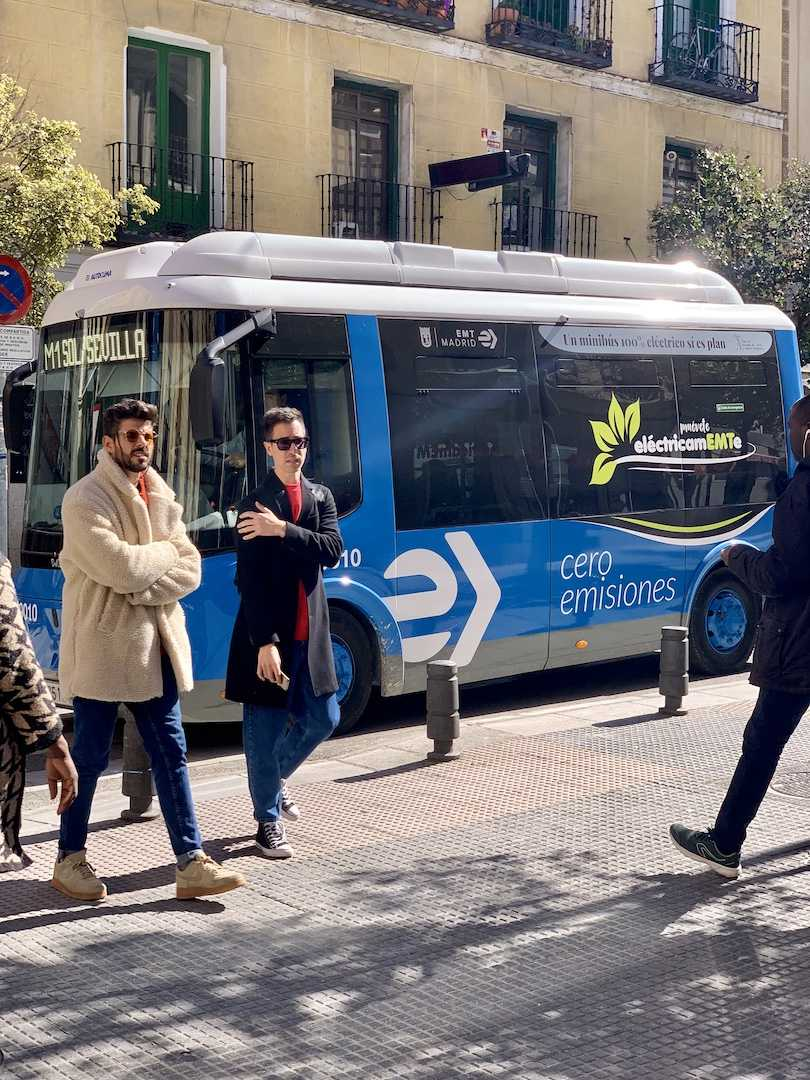

In [80]:
image = cv2.imread("/content/bus.jpg")
results = model2(image)
results[0].show()

In [78]:
from ultralytics import YOLO

model3 = YOLO("yolo11n-seg.yaml")
model3 = YOLO("yolo11n-seg.pt")
model3 = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")

results = model3.train(data="coco8-seg.yaml", epochs=50, imgsz=640)

Transferred 499/561 items from pretrained weights
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=coco8-seg.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/datasets/coco8-seg/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-seg/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/segment/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.6574      6.937      2.977      1.112         23        640: 100%|██████████| 1/1 [00:06<00:00,  6.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          4         17      0.573       0.85      0.878      0.635      0.142      0.167      0.166     0.0332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.197      7.685      3.017      1.457         22        640: 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          4         17      0.564       0.85       0.85      0.633      0.141      0.167      0.169       0.05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.141      8.069      2.422      1.324         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.556       0.85      0.851      0.616      0.139      0.167      0.169     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.085      8.378      1.983      1.231         36        640: 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

                   all          4         17      0.552       0.85      0.853      0.638      0.138      0.167      0.169     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.327      7.506      2.963      1.613         20        640: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.526       0.85      0.856      0.639      0.137      0.167      0.169     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.086      7.355      2.919      1.331         39        640: 100%|██████████| 1/1 [00:05<00:00,  5.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all          4         17      0.532       0.85      0.892      0.634      0.136      0.167      0.175     0.0838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.942      8.014      2.668      1.307         24        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all          4         17      0.559       0.85      0.871      0.632      0.149      0.183      0.187     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7279      8.302      2.071      1.126         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all          4         17      0.566      0.858      0.859      0.632      0.161        0.2      0.205     0.0869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.9772      7.524      3.636      1.443         28        640: 100%|██████████| 1/1 [00:05<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.567      0.866       0.86      0.629      0.158        0.2      0.199      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.182       6.97      3.591      1.592         42        640: 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.643      0.941       0.91       0.64      0.293       0.45      0.449      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.023      8.232      2.188      1.266         30        640: 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.778       0.65       0.86      0.635      0.296       0.45      0.449      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7369      8.002      2.546      1.176         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all          4         17      0.777       0.65      0.887      0.643      0.255       0.45      0.476      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.026      7.509       2.52      1.323         20        640: 100%|██████████| 1/1 [00:04<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.618      0.776       0.91      0.648      0.245       0.45      0.476       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.015      7.435       2.15      1.294         31        640: 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.798       0.65      0.912      0.649      0.447      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.8903      7.375      2.206        1.2         30        640: 100%|██████████| 1/1 [00:04<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all          4         17      0.811       0.65       0.91      0.648      0.459      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7436      7.213      1.743      1.101         23        640: 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all          4         17      0.818       0.65      0.887      0.628      0.468      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.031      7.886      2.504      1.231         54        640: 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.823       0.65      0.858       0.62      0.472      0.283      0.446       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9807      7.305      2.401      1.261         31        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all          4         17      0.823       0.65      0.858       0.62      0.472      0.283      0.446       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8056       8.03      1.516      1.135         26        640: 100%|██████████| 1/1 [00:05<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          4         17      0.819       0.65      0.876      0.624      0.477      0.283      0.466      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.991      7.622      2.271      1.299         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all          4         17      0.819       0.65      0.876      0.624      0.477      0.283      0.466      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7822       7.17      2.212      1.191         28        640: 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.828       0.65      0.865      0.622      0.487      0.283      0.458      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8758      7.649      2.423       1.26         35        640: 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         17      0.828       0.65      0.865      0.622      0.487      0.283      0.458      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.332      7.228      2.788      1.507         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          4         17      0.807      0.653      0.858       0.62      0.479      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.8224      7.236      2.101       1.17         26        640: 100%|██████████| 1/1 [00:04<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.807      0.653      0.858       0.62      0.479      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.102      6.515      2.822      1.322         33        640: 100%|██████████| 1/1 [00:05<00:00,  5.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all          4         17      0.806       0.65      0.857      0.619      0.483      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8273      7.083      2.459      1.229         29        640: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          4         17      0.806       0.65      0.857      0.619      0.483      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8788      6.978      2.372      1.212         19        640: 100%|██████████| 1/1 [00:05<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.808       0.65      0.857      0.611      0.482      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7048      7.168      1.929      1.104         31        640: 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

                   all          4         17      0.808       0.65      0.857      0.611      0.482      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8511      7.237      2.278      1.238         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         17      0.771       0.65      0.857      0.609      0.468      0.283      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.6451      7.229       1.65      1.107         18        640: 100%|██████████| 1/1 [00:05<00:00,  5.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          4         17      0.771       0.65      0.857      0.609      0.468      0.283      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9213      6.778      1.603      1.252         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         17      0.743       0.65      0.771      0.534      0.459      0.283      0.366      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8101      7.284      2.581      1.247         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.743       0.65      0.771      0.534      0.459      0.283      0.366      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       1.01      6.697      2.163      1.226         47        640: 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

                   all          4         17      0.714       0.65      0.771       0.53      0.446      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.7784      6.618      1.601      1.151         25        640: 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          4         17      0.714       0.65      0.771       0.53      0.446      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6897      6.517      1.892      1.119         31        640: 100%|██████████| 1/1 [00:05<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          4         17       0.71        0.7      0.771       0.53      0.425      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6021      6.305       1.24      1.141         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          4         17       0.71        0.7      0.771       0.53      0.425      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6058      6.763      2.243      1.064         24        640: 100%|██████████| 1/1 [00:05<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         17      0.675        0.7       0.77      0.539      0.419      0.283      0.367     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6957      6.581      1.644      1.118         31        640: 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all          4         17      0.675        0.7       0.77      0.539      0.419      0.283      0.367     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.8936      6.362      2.226      1.306         33        640: 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          4         17      0.683        0.7       0.77      0.544      0.411      0.283      0.367     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6832      6.973      1.749      1.132         20        640: 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.683        0.7       0.77      0.544      0.411      0.283      0.367     0.0829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.7043      7.237       1.01      1.054         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all          4         17      0.681        0.7       0.77      0.543       0.41      0.283      0.367     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.6582      7.175      0.858     0.9573         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          4         17      0.681        0.7       0.77      0.543       0.41      0.283      0.367     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8021      7.411       1.29      1.016         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.69s/it]

                   all          4         17      0.673        0.7      0.771      0.534      0.411      0.283      0.365     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.6894      6.372      1.359      1.122         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.673        0.7      0.771      0.534      0.411      0.283      0.365     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5856      6.162      1.205      1.135         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.666        0.7      0.771      0.512      0.733      0.196       0.28     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.7435      6.339       1.26      1.188         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.666        0.7      0.771      0.512      0.733      0.196       0.28     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.6898      7.123        1.1      1.057         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all          4         17      0.658        0.7       0.77      0.514      0.751      0.183      0.279     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5845      6.623      1.121      1.161         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all          4         17      0.658        0.7       0.77      0.514      0.751      0.183      0.279     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7179      6.413      1.133      1.206         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17      0.671        0.7       0.77      0.514      0.568      0.195      0.279     0.0809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5986      6.363     0.9596      1.029         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         17      0.671        0.7       0.77      0.514      0.568      0.195      0.279     0.0809



50 epochs completed in 0.112 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.1MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


                   all          4         17      0.802       0.65      0.912      0.648      0.451      0.283      0.476      0.156
                person          3         10      0.907        0.4      0.665       0.33      0.453        0.2      0.172      0.051
                   dog          1          1      0.675          1      0.995      0.796      0.675          1      0.995      0.199
                 horse          1          2      0.959          1      0.995      0.649          0          0          0          0
              elephant          1          2      0.579        0.5      0.828      0.323      0.579        0.5      0.695     0.0911
              umbrella          1          1      0.694          1      0.995      0.895          0          0          0          0
          potted plant          1          1          1          0      0.995      0.895          1          0      0.995      0.597
Speed: 2.6ms preprocess, 309.7ms inference, 0.0ms loss, 2.2ms postpro


0: 640x480 4 persons, 1 bus, 233.7ms
Speed: 3.9ms preprocess, 233.7ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 480)


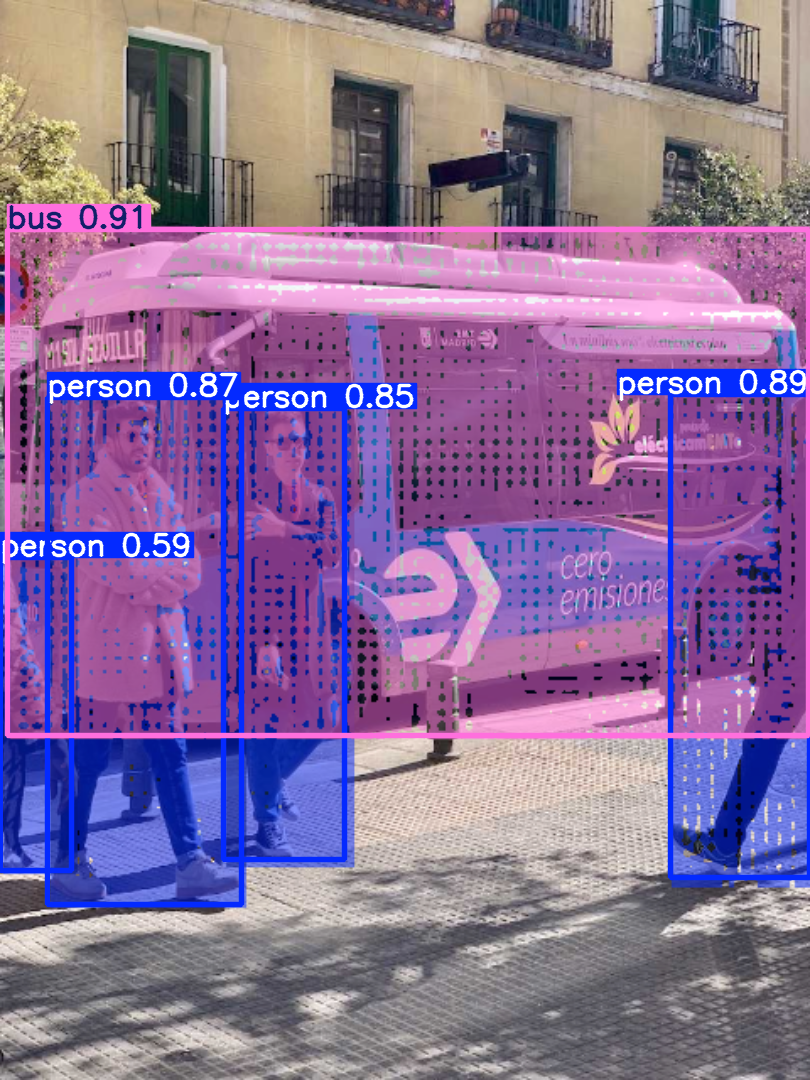

In [79]:
image = cv2.imread("/content/bus.jpg")
results = model3(image)
results[0].show()

**Internal Working of YOLO Pose Detection 🚀**

YOLO Pose Detection is an extension of YOLO (You Only Look Once), designed to estimate human keypoints efficiently. It follows the same single-stage detection pipeline but includes modifications to output keypoint coordinates for pose estimation.

**1️⃣ YOLO Pose Architecture**

YOLO Pose modifies the traditional YOLO detection head by adding keypoint regression for pose estimation.

**🧱 Model Structure**

**Backbone (Feature Extractor)**

Uses a CNN-based backbone (e.g., CSP-Darknet in YOLOv8) to extract features from input images.

**Neck (Feature Aggregation)**
PAN (Path Aggregation Network) enhances multi-scale feature representations.

**Head (Detection & Keypoint Regression)**

Unlike standard YOLO, which outputs bounding boxes + class probabilities, YOLO Pose adds keypoints for pose estimation.

**🔹 Output Tensor Structure**
For each detected object (human), the model predicts:

(x, y, w, h, confidence, class) → Bounding box
(x1, y1, confidence1), (x2, y2, confidence2), … → Keypoints (e.g., 17 keypoints for COCO dataset)
📌 Key Difference: Instead of just detecting objects, YOLO Pose detects body parts by regressing keypoints.

**2️⃣ Internal Working Pipeline**

**1. Preprocessing**

Resize & Normalize the input image to match the model’s input size (e.g., 640x640).
Convert image into a tensor for PyTorch or ONNX inference.

**2. Forward Pass Through CNN**

The input image passes through the backbone, extracting deep feature maps.
The neck enhances multi-scale feature representation.

**3. YOLO Pose Head (Keypoint Prediction)**

The detection head predicts bounding boxes + keypoints + confidence scores.
Each keypoint is predicted as (x, y, confidence), where:
(x, y): Coordinates of the joint.
confidence: How certain the model is about the keypoint's location.

**4. Post-processing**

Non-Maximum Suppression (NMS) removes overlapping detections.
Keypoint Refinement: Low-confidence keypoints are filtered out.
The final bounding box + keypoints are returned.

**3️⃣ Training Process**

YOLO Pose is trained using datasets like COCO Keypoints, where:

Each image contains annotated human keypoints (e.g., head, shoulders, knees).
The loss function is modified to include:
Bounding Box Loss (IoU-based)
Keypoint Loss (Mean Squared Error for keypoint positions)
Confidence Loss (Binary Cross-Entropy)

**4️⃣ Why YOLO Pose is Fast?**

Single-stage architecture: Predicts keypoints in one forward pass (unlike OpenPose, which has multiple stages).
Anchor-free approach (YOLOv8-Pose): Eliminates the need for predefined anchor boxes, reducing computations.
Optimized CNN layers (CSP-Darknet): Efficiently extracts key features for pose estimation.